# Load libraries

In [1]:
!pip install transformers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from transformers import pipeline
from tqdm import tqdm
tqdm.pandas()

# Load data

In [3]:
corpus = pd.read_csv('https://raw.githubusercontent.com/kyleishaumbay/Umbay-Hierro-CSCI-161.03-UV2/main/datasets/elonmusk_cleaned_corpus.csv')
corpus[
  ['date_published', 'text', 'cleaned_text']
].head()

,date_published,text,cleaned_text
0,2025-09-09 20:34:11,Taibbi is a journalist paid and bought by bill...,Taibbi journalist billionaire I SB Taibi usefu...
1,2025-09-09 20:26:01,@@margobarranti Hello dear... I really appreci...,Hello dear I appreciate comment I touch Send d...
2,2025-09-09 20:05:41,Hello dear... I really appreciate your likes a...,Hello dear I appreciate comment I touch Send d...
3,2025-09-09 20:04:40,Hello dear... I really appreciate your likes a...,Hello dear I appreciate comment I touch Send d...
4,2025-09-09 20:04:28,Hello dear... I really appreciate your likes a...,Hello dear I appreciate comment I touch Send d...


# BERT-Based Sentiment Analysis

In [4]:
sentiment_analyzer = pipeline('sentiment-analysis',
                              model='nlptown/bert-base-multilingual-uncased-sentiment',
                              device=0)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [5]:
short_comments = corpus[
  corpus['text'].str.len() < 512
].copy()
short_comments.head()

,title,link,date_published,text,like_count,reply_parent_id,source,cleaned_text
0,Taibbi is a journalist paid and bought by bill...,https://www.youtube.com/watch?v=BB__743Jfm0&lc...,2025-09-09 20:34:11,Taibbi is a journalist paid and bought by bill...,0,NaN,youtube,Taibbi journalist billionaire I SB Taibi usefu...
1,@@margobarranti Hello dear... I really appreci...,https://www.youtube.com/watch?v=kzlUyrccbos&lc...,2025-09-09 20:26:01,@@margobarranti Hello dear... I really appreci...,0,Ugy6M6SUBHCUtkU3RSh4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...
2,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:05:41,Hello dear... I really appreciate your likes a...,0,UgzYT3Etk-P5otJtTKF4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...
3,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:40,Hello dear... I really appreciate your likes a...,0,UgyIKvl9rpFtLHpw6Ul4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...
4,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:28,Hello dear... I really appreciate your likes a...,0,UgyB14bghklGyJpGm2N4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...


In [6]:
sentiment_analyzer(
    short_comments['text'].iloc[0]
)[0]

{'label': '1 star', 'score': 0.5647523403167725}

In [7]:
short_comments[['sentiment', 'sentiment_confidence']] = short_comments.progress_apply(
  lambda row: pd.Series(sentiment_analyzer(row['text'])[0]),
  axis=1
)

100%|██████████| 3079/3079 [09:02<00:00,  5.68it/s]


In [8]:
short_comments.head()

,title,link,date_published,text,like_count,reply_parent_id,source,cleaned_text,sentiment,sentiment_confidence
0,Taibbi is a journalist paid and bought by bill...,https://www.youtube.com/watch?v=BB__743Jfm0&lc...,2025-09-09 20:34:11,Taibbi is a journalist paid and bought by bill...,0,NaN,youtube,Taibbi journalist billionaire I SB Taibi usefu...,1 star,0.564752
1,@@margobarranti Hello dear... I really appreci...,https://www.youtube.com/watch?v=kzlUyrccbos&lc...,2025-09-09 20:26:01,@@margobarranti Hello dear... I really appreci...,0,Ugy6M6SUBHCUtkU3RSh4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...,5 stars,0.672944
2,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:05:41,Hello dear... I really appreciate your likes a...,0,UgzYT3Etk-P5otJtTKF4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...,5 stars,0.708380
3,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:40,Hello dear... I really appreciate your likes a...,0,UgyIKvl9rpFtLHpw6Ul4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...,5 stars,0.708380
4,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:28,Hello dear... I really appreciate your likes a...,0,UgyB14bghklGyJpGm2N4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...,5 stars,0.708380


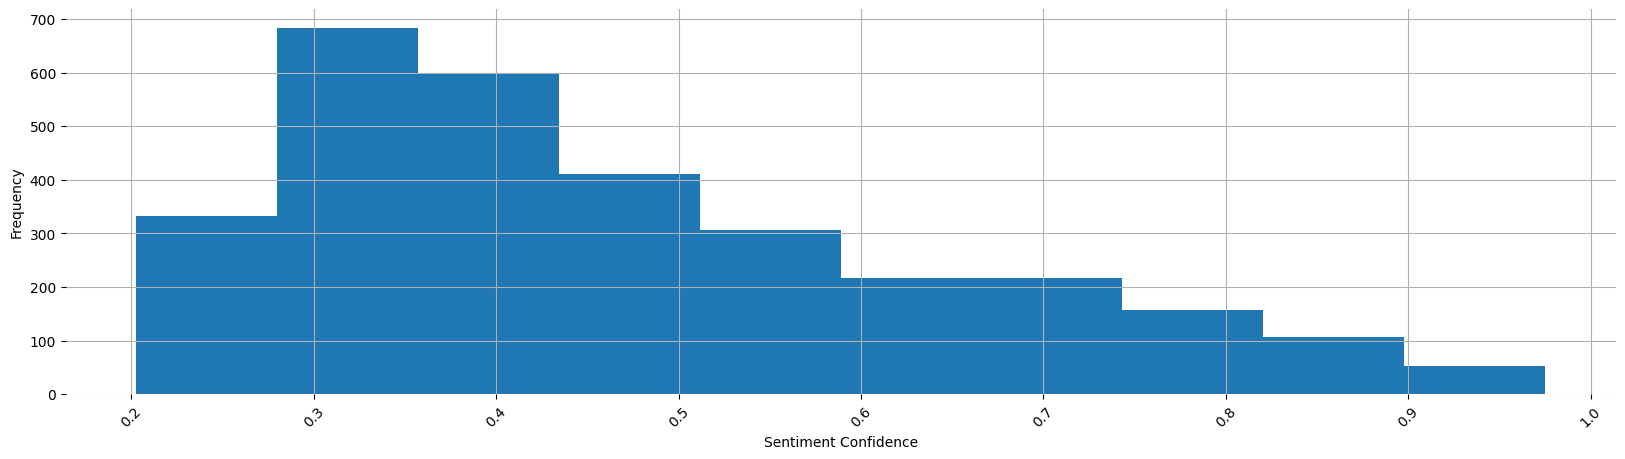

,count
sentiment,
1 star,1282
5 stars,1054
3 stars,328
4 stars,210
2 stars,205


In [9]:
fig, ax = plt.subplots(figsize=(20, 5))
short_comments['sentiment_confidence'].hist(ax=ax)

# Set labels
ax.set_xlabel('Sentiment Confidence')
ax.set_ylabel('Frequency')

# 45 degree angle for x-axis labels
ax.tick_params(axis='x', rotation=45)

# No spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

short_comments['sentiment'].value_counts()

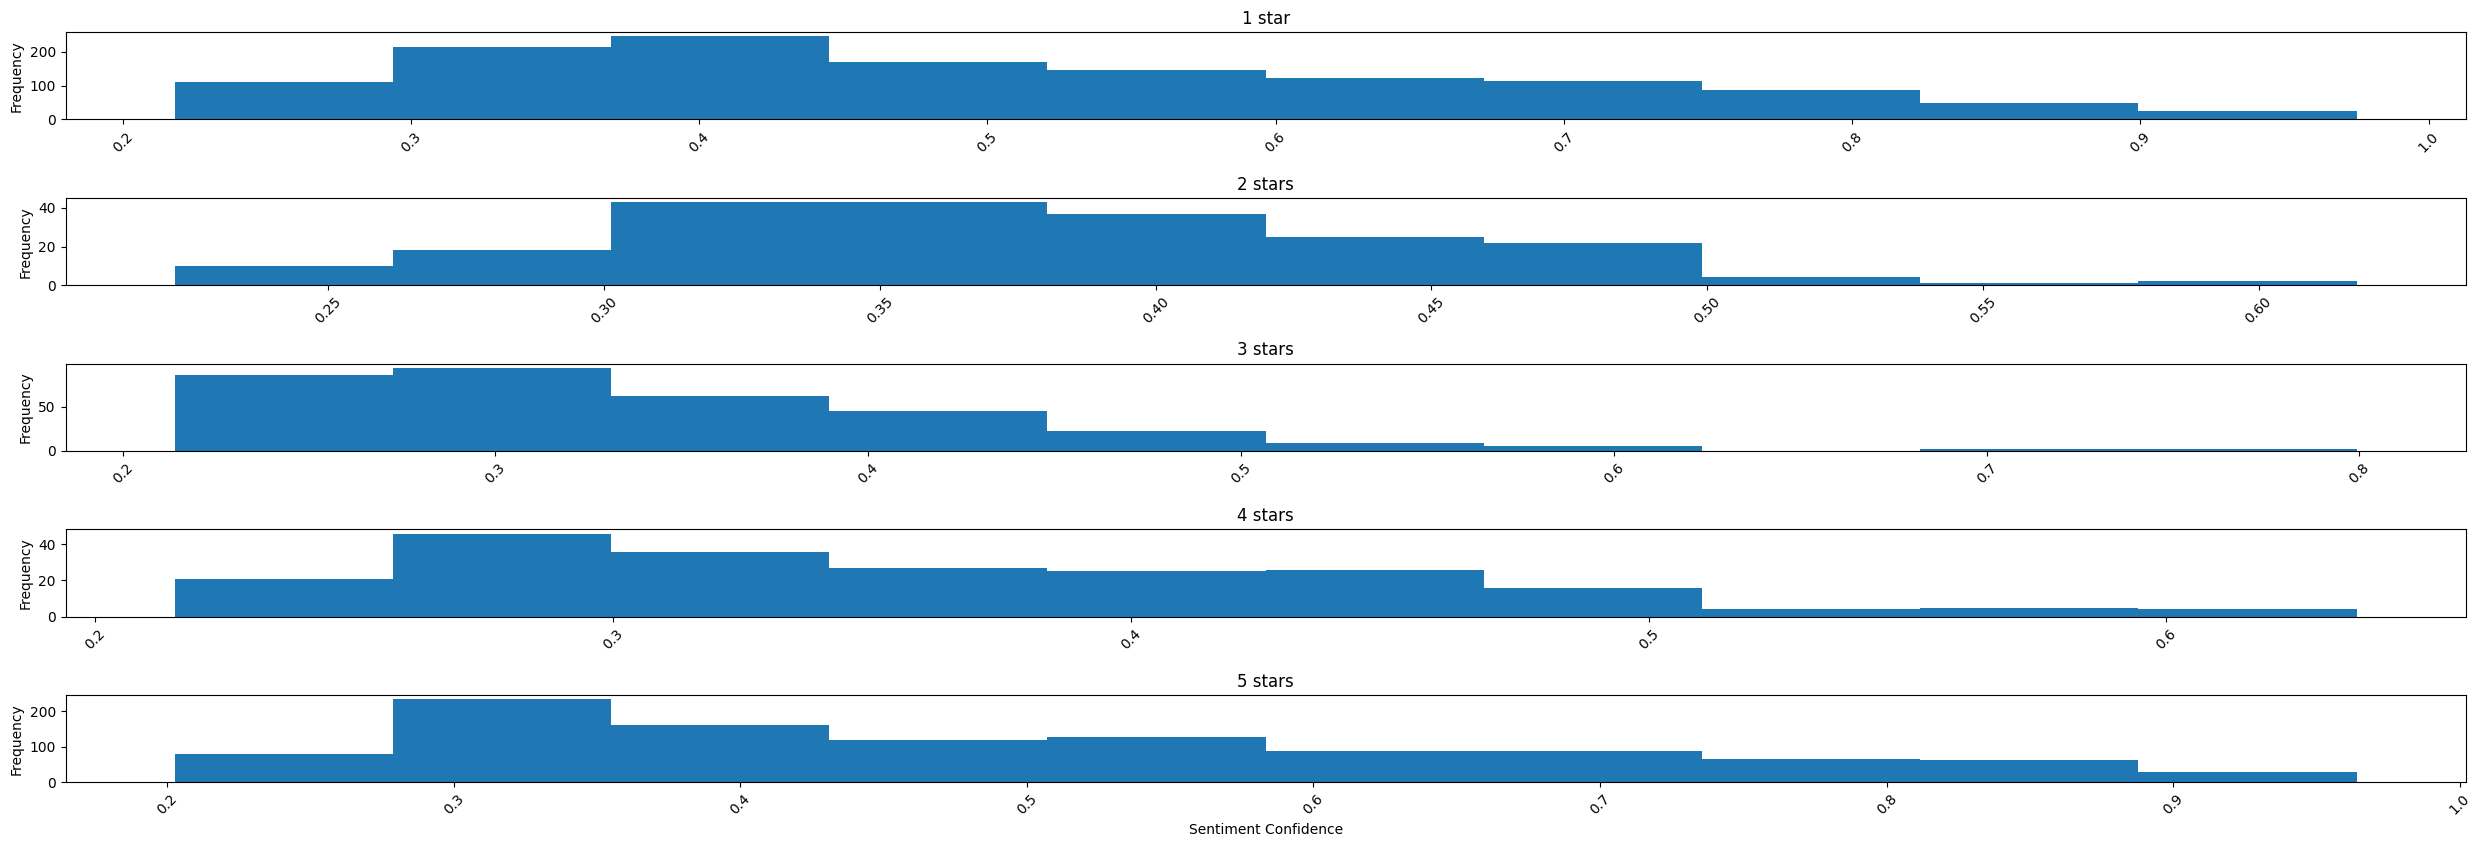

In [10]:
# Histogram of sentiment confidence along with the sentiment
fig, ax = plt.subplots(5, figsize=(30, 10))

short_comments['sentiment_confidence'].hist(
  by=short_comments['sentiment'],
  ax=ax,
)

# Add more space between subplots
plt.subplots_adjust(hspace=0.9)

# Set labels
ax[4].set_xlabel('Sentiment Confidence')
for a in ax:
  a.set_ylabel('Frequency')
  # 45 degree angle for x-axis labels
  a.tick_params(axis='x', rotation=45)

plt.show()

# BERT-Based Topic Modeling

In [11]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 9.8 MB/s eta 0:00:00


In [12]:
from bertopic import BERTopic

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [13]:
# fill NaN values with empty strings
corpus['cleaned_text'] = corpus['cleaned_text'].fillna('blank')

In [14]:
topic_model = BERTopic(language="multilingual",
                       calculate_probabilities=True, verbose=True,
                       n_gram_range=(1, 1), min_topic_size=3
                       )
topics, probs = topic_model.fit_transform(corpus['cleaned_text'])

2025-09-17 14:58:59,549 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/101 [00:00<?, ?it/s]

2025-09-17 15:00:51,855 - BERTopic - Embedding - Completed ✓
2025-09-17 15:00:51,856 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-17 15:01:24,830 - BERTopic - Dimensionality - Completed ✓
2025-09-17 15:01:24,831 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-17 15:01:30,248 - BERTopic - Cluster - Completed ✓
2025-09-17 15:01:30,256 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-17 15:01:30,514 - BERTopic - Representation - Completed ✓


In [15]:
len(corpus)

3202

In [16]:
topic_dataframe = topic_model.get_topic_info()
topic_dataframe

,Topic,Count,Name,Representation,Representative_Docs
0,-1,866,-1_you_human_selah_world,"[you, human, selah, world, and, trump, he, elo...",[illusion democracy There left Your senate I A...
1,0,156,0_blank___,"[blank, , , , , , , , , ]","[blank, blank, blank]"
2,1,89,1_musk_elon_may_himself,"[musk, elon, may, himself, kho, ng, he, mr, bo...","[Elon Musk, MESSAGE FROM OurMaker He One He ex..."
3,2,65,2_trump_elon_president_candidate,"[trump, elon, president, candidate, stay, demo...","[Great president Trump Good Elon, I Elon Musk ..."
4,3,45,3_musk_tarrif_trump_cummings,"[musk, tarrif, trump, cummings, shipping, depa...",[The mad MAGAs True conservative horrify party...
...,...,...,...,...,...
210,209,3,209_humiliate_jealousy_arrogant_poor,"[humiliate, jealousy, arrogant, poor, medium, ...","[Arrogant, jealousy medium, poor humiliate]"
211,210,3,210_loosely_obama_throw_barack,"[loosely, obama, throw, barack, center, magabi...",[And measure Great first business loan Obama S...
212,211,3,211_fema_ppls_livelihood_outrage,"[fema, ppls, livelihood, outrage, goverment, t...","[This corrupt US goverment, haha funny outrage..."
213,212,3,212_supplier_electric_discontinue_space,"[supplier, electric, discontinue, space, exper...",[If I Elon Musk I bill shut business space x I...


`get_topic(int)` returns the keywords of a given topic index.
* input: index of a topic
* output: keywords of the topic

In [17]:
topic_model.get_topic(-1)

[('you', np.float64(0.004480148037045543)),
 ('human', np.float64(0.004382012255346019)),
 ('selah', np.float64(0.004348411508823068)),
 ('world', np.float64(0.003968630009018105)),
 ('and', np.float64(0.0037814027339271453)),
 ('trump', np.float64(0.003718326083409747)),
 ('he', np.float64(0.003698034146914952)),
 ('elon', np.float64(0.0035793906949903357)),
 ('musk', np.float64(0.0035748616917435833)),
 ('the', np.float64(0.003561792554823227))]

`topics_` returns the list of topic numbers for each document

In [18]:
topic_model.topics_

[35,
 53,
 53,
 53,
 53,
 53,
 -1,
 111,
 0,
 11,
 38,
 142,
 -1,
 0,
 161,
 78,
 180,
 203,
 178,
 179,
 68,
 68,
 3,
 47,
 79,
 42,
 68,
 0,
 0,
 -1,
 -1,
 68,
 -1,
 -1,
 -1,
 46,
 14,
 94,
 94,
 10,
 -1,
 12,
 180,
 1,
 31,
 -1,
 30,
 31,
 31,
 -1,
 -1,
 -1,
 -1,
 42,
 -1,
 179,
 -1,
 159,
 95,
 -1,
 31,
 -1,
 -1,
 75,
 63,
 -1,
 62,
 31,
 -1,
 180,
 -1,
 62,
 25,
 31,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 12,
 -1,
 117,
 117,
 1,
 7,
 134,
 4,
 4,
 25,
 91,
 176,
 -1,
 0,
 -1,
 -1,
 -1,
 113,
 93,
 -1,
 0,
 35,
 -1,
 138,
 1,
 136,
 1,
 31,
 76,
 -1,
 92,
 37,
 37,
 135,
 66,
 0,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 0,
 0,
 138,
 115,
 77,
 -1,
 -1,
 13,
 25,
 0,
 63,
 74,
 75,
 116,
 160,
 -1,
 45,
 45,
 45,
 45,
 147,
 -1,
 181,
 181,
 0,
 6,
 -1,
 112,
 -1,
 -1,
 1,
 28,
 20,
 11,
 181,
 67,
 67,
 67,
 67,
 67,
 177,
 -1,
 67,
 67,
 67,
 -1,
 -1,
 67,
 177,
 67,
 177,
 0,
 42,
 133,
 73,
 0,
 71,
 26,
 -1,
 11,
 -1,
 47,
 -1,
 -1,
 11,
 -1,
 11,
 -1,
 35,
 114,
 74,
 -1,
 -1,
 -1,

In [19]:
try:
  topic_model.visualize_topics()
except ValueError:
  # Dataset too small
  print("Dataset too small to visualize topics")

In [20]:
topic_model.visualize_distribution(probs[10], min_probability=0.015)

# BERT-Based Toxic Comment Classification

In [21]:
toxic_analyzer = pipeline('text-classification',
                          model='unitary/toxic-bert',
                          device=0)

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Run `toxic_analyzer` on a sample piece of text.

`toxic_analyzer` returns
* `label`: the more stars, the more positive
* `score`: the higher the score, the more confident

In [22]:
result = toxic_analyzer(
  short_comments.iloc[9]['text']
)
print(result)
print(short_comments.iloc[9]['text'])

[{'label': 'toxic', 'score': 0.0006307716830633581}]
Liked pushes video thru algorithm...not in Agreement with (Worship as a Hero)


In [23]:
short_comments[['toxicity', 'toxicity_confidence']] = short_comments.progress_apply(
  lambda row: pd.Series(toxic_analyzer(row['text'])[0]),
  axis=1
)

100%|██████████| 3079/3079 [08:32<00:00,  6.01it/s]


In [24]:
short_comments

,title,link,date_published,text,like_count,reply_parent_id,source,cleaned_text,sentiment,sentiment_confidence,toxicity,toxicity_confidence
0,Taibbi is a journalist paid and bought by bill...,https://www.youtube.com/watch?v=BB__743Jfm0&lc...,2025-09-09 20:34:11,Taibbi is a journalist paid and bought by bill...,0,NaN,youtube,Taibbi journalist billionaire I SB Taibi usefu...,1 star,0.564752,toxic,0.492139
1,@@margobarranti Hello dear... I really appreci...,https://www.youtube.com/watch?v=kzlUyrccbos&lc...,2025-09-09 20:26:01,@@margobarranti Hello dear... I really appreci...,0,Ugy6M6SUBHCUtkU3RSh4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...,5 stars,0.672944,toxic,0.000760
2,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:05:41,Hello dear... I really appreciate your likes a...,0,UgzYT3Etk-P5otJtTKF4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...,5 stars,0.708380,toxic,0.000606
3,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:40,Hello dear... I really appreciate your likes a...,0,UgyIKvl9rpFtLHpw6Ul4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...,5 stars,0.708380,toxic,0.000606
4,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:28,Hello dear... I really appreciate your likes a...,0,UgyB14bghklGyJpGm2N4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...,5 stars,0.708380,toxic,0.000606
...,...,...,...,...,...,...,...,...,...,...,...,...
3196,"+blaze armoru<br>If both alone make 10x, they ...",https://www.youtube.com/watch?v=5gnlhmaM-dM&lc...,2018-08-31 23:32:33,"+blaze armoru\nIf both alone make 10x, they ar...",52,UgxF6E1eBVIDZIPSBQh4AaABAg,youtube,blaze armoru If alone x total x If together x ...,1 star,0.278606,toxic,0.000781
3198,Muskwatch,https://www.youtube.com/watch?v=5gnlhmaM-dM&lc...,2018-08-31 21:55:22,Muskwatch,21,UgxF6E1eBVIDZIPSBQh4AaABAg,youtube,Muskwatch,3 stars,0.245856,toxic,0.001044
3199,Skt skt skt skt...,https://www.youtube.com/watch?v=5gnlhmaM-dM&lc...,2018-08-31 21:46:16,Skt skt skt skt...,9,UgxF6E1eBVIDZIPSBQh4AaABAg,youtube,Skt skt skt skt,1 star,0.280343,toxic,0.208115
3200,&gt; 2 days ago<br><br>:thonk:,https://www.youtube.com/watch?v=5gnlhmaM-dM&lc...,2018-08-31 21:40:54,> 2 days ago\n\n:thonk:,33,UgxF6E1eBVIDZIPSBQh4AaABAg,youtube,ago thonk,1 star,0.430206,toxic,0.000858


# BERT-Based Youtube Comment Sentiment Analysis (Using `rahulk98/bert-finetuned-youtube_sentiment_analysis`)

We tried this model alongside the previous ones because it is specifically finetuned for sentiment analysis on YouTube comments. This means it has been trained on a dataset of YouTube comments, making it potentially more accurate for this specific task compared to a general sentiment analysis model.

In [25]:
youtube_sentiment_analyzer = pipeline('sentiment-analysis',
                                      model='rahulk98/bert-finetuned-youtube_sentiment_analysis',
                                      device=0)

config.json:   0%|          | 0.00/884 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [26]:
short_comments[['youtube_sentiment', 'youtube_sentiment_confidence']] = short_comments.progress_apply(
  lambda row: pd.Series(youtube_sentiment_analyzer(row['text'])[0]),
  axis=1
)

100%|██████████| 3079/3079 [07:51<00:00,  6.54it/s]


In [27]:
short_comments.head()

,title,link,date_published,text,like_count,reply_parent_id,source,cleaned_text,sentiment,sentiment_confidence,toxicity,toxicity_confidence,youtube_sentiment,youtube_sentiment_confidence
0,Taibbi is a journalist paid and bought by bill...,https://www.youtube.com/watch?v=BB__743Jfm0&lc...,2025-09-09 20:34:11,Taibbi is a journalist paid and bought by bill...,0,NaN,youtube,Taibbi journalist billionaire I SB Taibi usefu...,1 star,0.564752,toxic,0.492139,neutral,0.772497
1,@@margobarranti Hello dear... I really appreci...,https://www.youtube.com/watch?v=kzlUyrccbos&lc...,2025-09-09 20:26:01,@@margobarranti Hello dear... I really appreci...,0,Ugy6M6SUBHCUtkU3RSh4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...,5 stars,0.672944,toxic,0.000760,positive,0.993266
2,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:05:41,Hello dear... I really appreciate your likes a...,0,UgzYT3Etk-P5otJtTKF4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...,5 stars,0.708380,toxic,0.000606,positive,0.993300
3,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:40,Hello dear... I really appreciate your likes a...,0,UgyIKvl9rpFtLHpw6Ul4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...,5 stars,0.708380,toxic,0.000606,positive,0.993300
4,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:28,Hello dear... I really appreciate your likes a...,0,UgyB14bghklGyJpGm2N4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...,5 stars,0.708380,toxic,0.000606,positive,0.993300


toxicity,obscene,toxic
youtube_sentiment,,
negative,1,1092
neutral,1,1355
positive,1,629


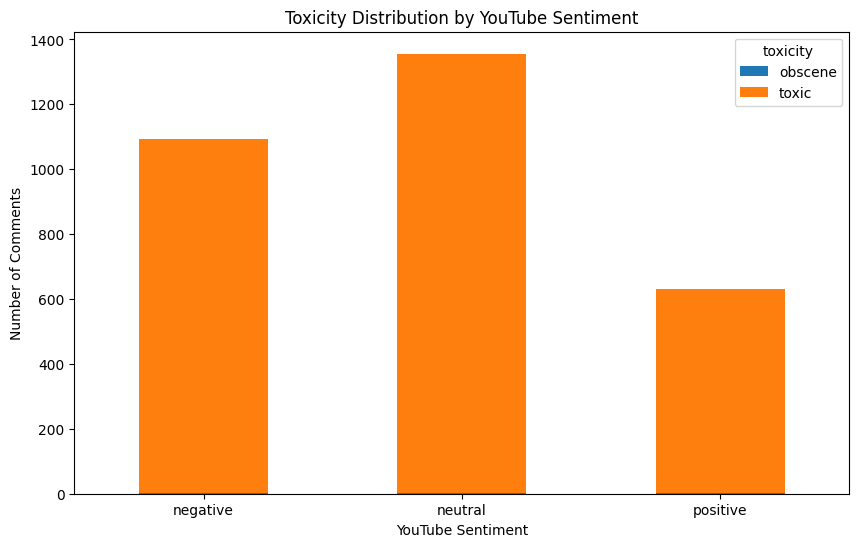

In [29]:
# relationship between YouTube sentiment and toxicity
sentiment_toxicity_crosstab = pd.crosstab(short_comments['youtube_sentiment'], short_comments['toxicity'])
display(sentiment_toxicity_crosstab)

# Visualization
sentiment_toxicity_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Toxicity Distribution by YouTube Sentiment')
plt.xlabel('YouTube Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.show()


# Conclusion

Based on the results, comparing the sentiment labels from the general BERT model and the BERT-based YouTube comment sentiment analysis model, it appears the latter provided more relevant results for this specific corpus of YouTube comments. This is due to the model being finetuned on YouTube data, which made it better equipped to understand the nuances and language used in that context, leading to potentially different and more accurate sentiment classifications for this dataset, with much higher confidence scores for its decisions and classifications.